In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
import decoupler as dc
from tqdm import tqdm
from typing import Union, List, Dict
from pandas.core.frame import DataFrame

In [2]:
data_dir = os.path.join(os.getcwd(), '.data')
os.makedirs(data_dir, exist_ok=True)
os.listdir(data_dir)

['liana_res_compartment.csv',
 'initial_tensor.pkl',
 'final_tensor.pkl',
 'anndata_liana.h5ad',
 'final_tensor_compartment.pkl',
 'final_tensor_compartment_healthy.pkl',
 'initial_tensor_compartment.pkl',
 'Marburg_cell_states_locked_ctl240709.raw.h5ad',
 'final_tensor_compartment_COPD.pkl']

In [3]:
adata = sc.read_h5ad(os.path.join(data_dir, 'Marburg_cell_states_locked_ctl240709.raw.h5ad'))
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status', 'seed_labels', 'batch-scANVI'
    var: 'mt', 'ribo'
    uns: 'cell_compartment_colors', 'cell_states_colors', 'disease_colors', 'group_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_umap'

In [5]:
adata[adata.obs['disease'] == 'healthy'].write_h5ad(os.path.join(data_dir, 'Marburg_cell_states_locked_ctl240709_healthy.raw.h5ad'))
adata[adata.obs['disease'] == 'COPD'].write_h5ad(os.path.join(data_dir, 'Marburg_cell_states_locked_ctl240709_COPD.raw.h5ad'))

In [4]:
progeny = dc.get_progeny('human', 500)
progeny

/home/ceger/miniforge3/envs/liana_c2c-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [5]:
df = pd.read_csv(os.path.join(data_dir, 'liana_res_compartment.csv'), index_col=0)
df

,batch,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
0,CHE01_CTRL,Basal,Mixed,APP,CD74,7.412088,0.0,53.983128,0.739385,1.108115,0.016137,0.892482,0.000250,2.808640e-10
1,CHE01_CTRL,Goblet,Mixed,APP,CD74,7.376490,0.0,53.385807,0.701348,0.888435,0.015959,0.891947,0.000293,1.123452e-09
2,CHE01_CTRL,Basal,Ciliated,APP,CD74,7.283055,0.0,52.322640,0.640498,0.938717,0.015641,0.890974,0.000250,2.527757e-09
3,CHE01_CTRL,Goblet,Ciliated,APP,CD74,7.247458,0.0,51.743690,0.602461,0.719037,0.015468,0.890432,0.000635,1.011091e-08
4,CHE01_CTRL,Club,Mixed,APP,CD74,7.198581,0.0,50.400566,0.511244,0.612547,0.015066,0.889142,0.000798,2.274930e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766863,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR2A,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766864,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR4,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766865,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR1D,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766866,ST10_GnR_IAV,SupraB,SupraB,ADO,ADORA3,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00


In [6]:
context_dict = {batch: list(set(adata.obs[adata.obs['batch'] == batch]['group']))[0] for batch in set(adata.obs['batch'])}
context_dict

{'CHE02_IAV': 'copd_iav',
 'CSE_06_CRTL': 'copd_ctrl',
 'GER02_IAV': 'healthy_iav',
 'CSE_06_IAV': 'copd_iav',
 'ST08_GnR_CTRL': 'healthy_ctrl',
 'CSE03_CTRL': 'copd_ctrl',
 'GER14_CRTL': 'healthy_ctrl',
 'GnR_07_CTRL': 'healthy_ctrl',
 'ST10_GnR_IAV': 'healthy_iav',
 'ST07_CSE_CTRL': 'copd_ctrl',
 'GER12_CTRL': 'healthy_ctrl',
 'CSE03_IAV': 'copd_iav',
 'ST09_CSE_IAV': 'copd_iav',
 'CHE03_IAV': 'copd_iav',
 'GnR_07_IAV': 'healthy_iav',
 'GER02_CTRL': 'healthy_ctrl',
 'GER14_IAV': 'healthy_iav',
 'CHE01_CTRL': 'copd_ctrl',
 'GnR08_CTRL': 'healthy_ctrl',
 'GnR08_IAV': 'healthy_iav',
 'CHE01_IAV': 'copd_iav',
 'CHE03_CTRL': 'copd_ctrl',
 'GER12_IAV': 'healthy_iav',
 'CHE02_CTRL': 'copd_ctrl'}

In [7]:
group_infection_dict = {group: list(set(adata.obs[adata.obs['group'] == group]['infection']))[0] for group in set(adata.obs['group'])}
group_infection_dict

{'healthy_ctrl': 'CTRL',
 'copd_iav': 'IAV',
 'healthy_iav': 'IAV',
 'copd_ctrl': 'CTRL'}

In [8]:
group_disease_dict = {group: list(set(adata.obs[adata.obs['group'] == group]['disease']))[0] for group in set(adata.obs['group'])}
group_disease_dict

{'healthy_ctrl': 'healthy',
 'copd_iav': 'COPD',
 'healthy_iav': 'healthy',
 'copd_ctrl': 'COPD'}

In [9]:
context_dict_rev = {group: sorted(list(set(adata.obs[adata.obs['group'] == group]['batch']))) for group in set(adata.obs['group'])}
context_dict_rev

{'healthy_ctrl': ['GER02_CTRL',
  'GER12_CTRL',
  'GER14_CRTL',
  'GnR08_CTRL',
  'GnR_07_CTRL',
  'ST08_GnR_CTRL'],
 'copd_iav': ['CHE01_IAV',
  'CHE02_IAV',
  'CHE03_IAV',
  'CSE03_IAV',
  'CSE_06_IAV',
  'ST09_CSE_IAV'],
 'healthy_iav': ['GER02_IAV',
  'GER12_IAV',
  'GER14_IAV',
  'GnR08_IAV',
  'GnR_07_IAV',
  'ST10_GnR_IAV'],
 'copd_ctrl': ['CHE01_CTRL',
  'CHE02_CTRL',
  'CHE03_CTRL',
  'CSE03_CTRL',
  'CSE_06_CRTL',
  'ST07_CSE_CTRL']}

In [10]:
df['group'] = df['batch'].map(context_dict)
df['disease'] = df['group'].map(group_disease_dict)
df['infection'] = df['group'].map(group_infection_dict)
df['magnitude_rank_inverted'] = df['magnitude_rank'].apply(lambda x: -np.log10(x + np.finfo(float).eps))
df

,batch,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank,group,disease,infection,magnitude_rank_inverted
0,CHE01_CTRL,Basal,Mixed,APP,CD74,7.412088,0.0,53.983128,0.739385,1.108115,0.016137,0.892482,0.000250,2.808640e-10,copd_ctrl,COPD,CTRL,9.551504e+00
1,CHE01_CTRL,Goblet,Mixed,APP,CD74,7.376490,0.0,53.385807,0.701348,0.888435,0.015959,0.891947,0.000293,1.123452e-09,copd_ctrl,COPD,CTRL,8.949446e+00
2,CHE01_CTRL,Basal,Ciliated,APP,CD74,7.283055,0.0,52.322640,0.640498,0.938717,0.015641,0.890974,0.000250,2.527757e-09,copd_ctrl,COPD,CTRL,8.597265e+00
3,CHE01_CTRL,Goblet,Ciliated,APP,CD74,7.247458,0.0,51.743690,0.602461,0.719037,0.015468,0.890432,0.000635,1.011091e-08,copd_ctrl,COPD,CTRL,7.995210e+00
4,CHE01_CTRL,Club,Mixed,APP,CD74,7.198581,0.0,50.400566,0.511244,0.612547,0.015066,0.889142,0.000798,2.274930e-08,copd_ctrl,COPD,CTRL,7.643032e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766863,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR2A,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00,healthy_iav,healthy,IAV,-9.643275e-17
7766864,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR4,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00,healthy_iav,healthy,IAV,-9.643275e-17
7766865,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR1D,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00,healthy_iav,healthy,IAV,-9.643275e-17
7766866,ST10_GnR_IAV,SupraB,SupraB,ADO,ADORA3,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00,healthy_iav,healthy,IAV,-9.643275e-17


In [25]:
df = df[df['magnitude_rank_inverted'] > 0]

In [50]:
interaction = 'ligand_complex'
metric = 'lr_gmeans'
df[df[interaction].str.startswith('CXCL')].assign(
    ligand_disease=lambda x: x[interaction] + '_' + x['disease'],
    count = 1
).groupby(
    'ligand_disease'
).aggregate(
    {
        metric: 'sum',
        'source': 'first',
        'target': 'first',
        'disease': 'first',
        'count': 'sum',
        interaction: 'first'
    }
).pivot_table(
    index=interaction,
    columns='disease',
    values=metric
).fillna(
    0
).assign(
    sum=lambda x: x['COPD'] + x['healthy'],
    healthy_norm=lambda x: x['healthy'] / x['sum'],
    COPD_norm=lambda x: x['COPD'] / x['sum']
)[['healthy_norm', 'COPD_norm']].plot.barh(stacked=True)

KeyError: "Column(s) ['lr_gmeans'] do not exist"

In [11]:
pathway_dict = {}
for source, target in progeny.groupby('source')['target'].apply(set).items():
    pathway_dict[source] = {'healthy': [], 'COPD': []}
    healthy_value = df[(df['disease'] == 'healthy') & ((df['ligand_complex'].isin(target)) | df['receptor_complex'].isin(target))]['magnitude_rank_inverted'].sum()
    COPD_value = df[(df['disease'] == 'COPD') & ((df['ligand_complex'].isin(target)) | df['receptor_complex'].isin(target))]['magnitude_rank_inverted'].sum()
    pathway_dict[source]['healthy'] = healthy_value
    pathway_dict[source]['COPD'] = COPD_value
    

In [12]:
pathway_df = pd.DataFrame.from_dict(pathway_dict).T
pathway_df

,healthy,COPD
Androgen,43927.468980,46079.396513
EGFR,32964.639028,33843.089788
Estrogen,103232.244727,106674.130358
Hypoxia,42878.705812,45543.915208
JAK-STAT,60179.424160,61165.312481
MAPK,64541.550279,66663.864090
NFkB,107793.363871,110801.345423
PI3K,22051.812826,22840.708949
TGFb,64181.035489,65600.333671
TNFa,131471.386288,135967.526539


In [16]:
pathway_df['sum'] = pathway_df['healthy'] + pathway_df['COPD']
pathway_df['healthy_norm'] = pathway_df['healthy'] / pathway_df['sum']
pathway_df['COPD_norm'] = pathway_df['COPD'] / pathway_df['sum']
pathway_df

,healthy,COPD,sum,healthy_norm,COPD_norm
Androgen,43927.468980,46079.396513,90006.865493,0.488046,0.511954
EGFR,32964.639028,33843.089788,66807.728816,0.493426,0.506574
Estrogen,103232.244727,106674.130358,209906.375085,0.491801,0.508199
Hypoxia,42878.705812,45543.915208,88422.621020,0.484929,0.515071
JAK-STAT,60179.424160,61165.312481,121344.736641,0.495938,0.504062
MAPK,64541.550279,66663.864090,131205.414368,0.491912,0.508088
NFkB,107793.363871,110801.345423,218594.709294,0.493120,0.506880
PI3K,22051.812826,22840.708949,44892.521775,0.491214,0.508786
TGFb,64181.035489,65600.333671,129781.369160,0.494532,0.505468
TNFa,131471.386288,135967.526539,267438.912827,0.491594,0.508406


<Axes: >

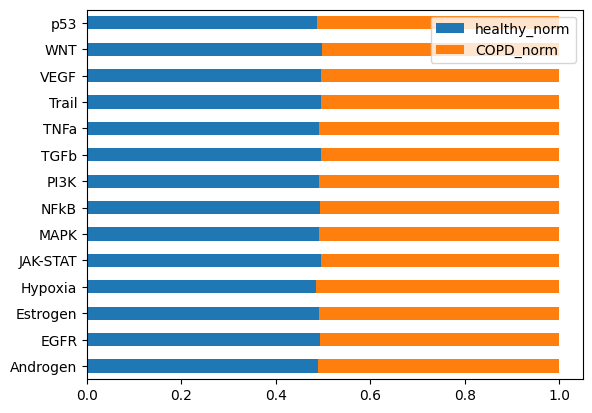

In [20]:
pathway_df[['healthy_norm', 'COPD_norm']].plot.barh(stacked=True)

In [27]:
CXCL11_dict

{'healthy': 215.34150989930214, 'COPD': 147.59352691443019}

In [30]:
df = df[df['magnitude_rank_inverted'] > 0]

In [37]:
CXCL11_dict = {}
healthy_value = df[(df['disease'] == 'healthy') & ((df['ligand_complex'].isin(['CXCL11'])))]['magnitude_rank_inverted'].sum()
COPD_value = df[(df['disease'] == 'COPD') & df['ligand_complex'].isin(['CXCL11'])]['magnitude_rank_inverted'].sum()
CXCL11_dict['healthy'] = healthy_value
CXCL11_dict['COPD'] = COPD_value
CXCL11_dict

{'healthy': 215.3415098993027, 'COPD': 147.5935269144308}

In [38]:
CXCL_dict = {}
healthy_value = df[(df['disease'] == 'healthy') & ((df['ligand_complex'].str.startswith('CXCL')))]['magnitude_rank_inverted'].sum()
COPD_value = df[(df['disease'] == 'COPD') & df['ligand_complex'].str.startswith('CXCL')]['magnitude_rank_inverted'].sum()
CXCL_dict['healthy'] = healthy_value
CXCL_dict['COPD'] = COPD_value
CXCL_dict

{'healthy': 4916.801194029432, 'COPD': 4478.442136329631}

In [40]:
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status', 'seed_labels', 'batch-scANVI'
    var: 'mt', 'ribo'
    uns: 'cell_compartment_colors', 'cell_states_colors', 'disease_colors', 'group_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_umap'

In [42]:
adata.var.loc['CXCL11']

mt      False
ribo    False
Name: CXCL11, dtype: bool

In [45]:
adata[:, 'CXCL11'].X.sum()

228605.0

In [46]:
print(
adata[adata.obs['disease'] == 'healthy'][:, 'CXCL11'].X.sum(),
adata[adata.obs['disease'] == 'COPD'][:, 'CXCL11'].X.sum()
)

153140.0 75465.0
